### Truncated SVD 
- Inspect how many components we should reduce the dimensions of doc-to-term matrix into

In [9]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pickle

In [5]:
# import the dataframe
with open('../data/doc_words.pkl','rb') as fin:
    doc_word = pickle.load(fin)

In [14]:
# Truncated SVD for dtm matrix (sparse matrix)
svd_ori = TruncatedSVD(15)  # Decompose dtm features into 15 components
projected = svd_ori.fit_transform(doc_word)
print('Dimension before decomposition: ',doc_word.shape)
print('Dimension after decomposition : ',projected.shape)

Dimension before decomposition:  (13625, 1222303)
Dimension after decomposition :  (13625, 15)


In [7]:
# Collect the %-variance explained
ori_sum_exvar = sum(svd_ori.explained_variance_)
ori_exp_var = [(each/ori_sum_exvar) for each in svd_ori.explained_variance_]

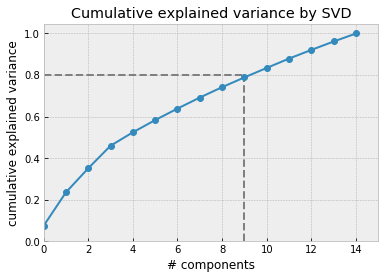

In [12]:
# Plot the variance explained

plt.style.use('bmh')
plt.plot(np.cumsum(ori_exp_var), 'o-')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by SVD')
plt.xlim((0,15))
plt.ylim((0,plt.ylim()[1]))
plt.hlines(0.8,plt.xlim()[0], 9, linestyles='dashed',colors='gray')
plt.vlines(9, 0,0.8, linestyles='dashed',colors='gray')
plt.savefig('../docs/figures/SVDexplainedVariance.png',transparent=True);

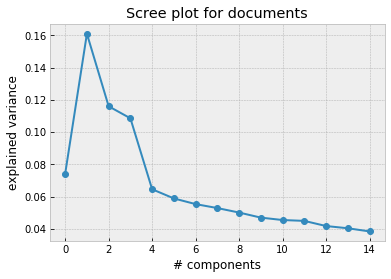

In [15]:
# Scree plot 
plt.plot(ori_exp_var, 'o-')
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for documents');
plt.savefig('../docs/figures/SVDscreeplot.png',transparent=True)

Note: 
- Nine components capture about 80% of the variance explained 

---